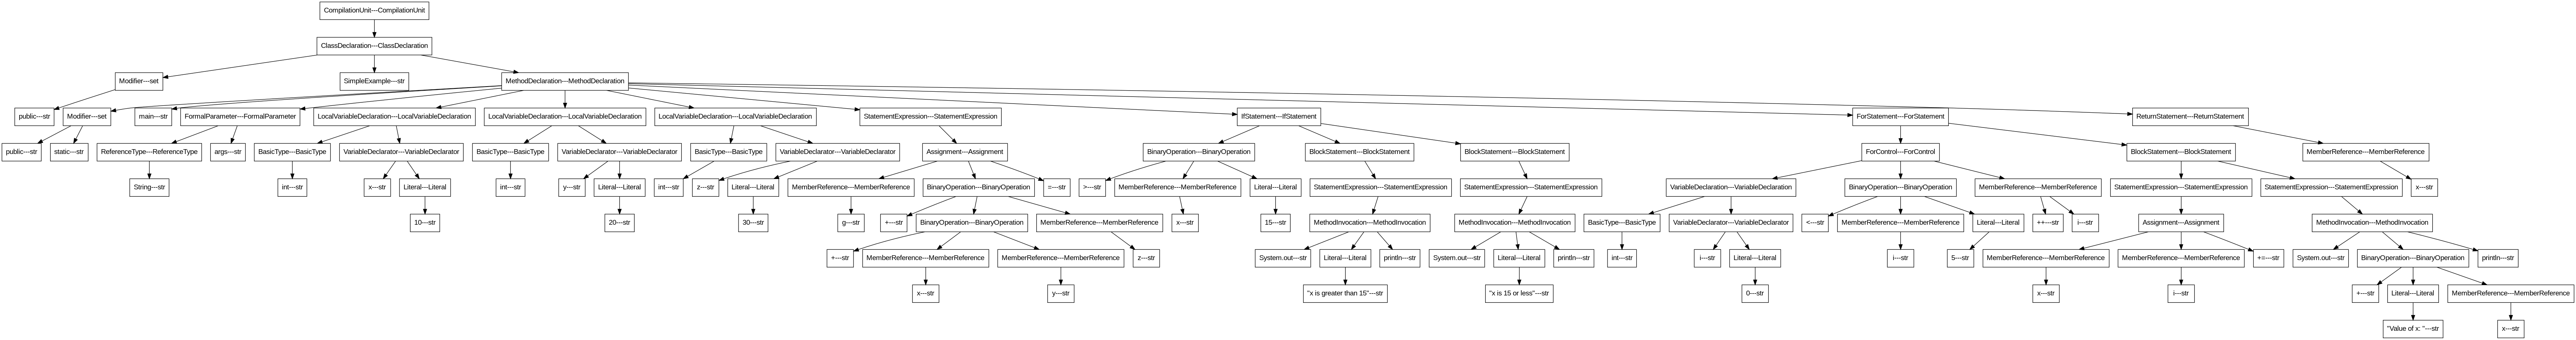

In [ ]:
import os
import javalang
import javalang.tree
import javalang.ast
from anytree import AnyNode, RenderTree
from javalang.ast import Node
func_path = "/home/zixian/PycharmProjects/semantic_graph_code_code_clone/test.java"

programfile=open(func_path,encoding='utf-8')
programtext=programfile.read()
programtokens=javalang.tokenizer.tokenize(programtext)

parser=javalang.parse.Parser(programtokens)
programast=parser.parse_member_declaration()

# programast=javalang.parser.parse(programtokens)




# def createtree(root,node,nodelist,parent=None):
#     id = len(nodelist)
#     #print(id)
#     token, children = get_token(node), get_child(node)
#     if id==0:
#         root.token=token
#         root.data=node
#     else:
#         newnode=AnyNode(id=id,token=token,data=node,parent=parent)
#     nodelist.append(node)
#     for child in children:
#         if id==0:
#             createtree(root,child, nodelist, parent=root)
#         else:
#             createtree(root,child, nodelist, parent=newnode)

# def get_token(node):
#     token = ''
#     if isinstance(node, str):
#         token = node
#     elif isinstance(node, set):
#         token = 'Modifier'
#     elif isinstance(node, Node):
#         token = node.__class__.__name__
#         if token == 'BasicType':
#             print(node.name)
#     return token

# def get_child(root):
#     if isinstance(root, Node):
#         children = root.children
#     elif isinstance(root, set):
#         children = list(root)
#     else:
#         children = []

#     def expand(nested_list):
#         for item in nested_list:
#             if isinstance(item, list):
#                 for sub_item in expand(item):
#                     #print(sub_item)
#                     yield sub_item
#             elif item:
#                 #print(item)
#                 yield item
#     return list(expand(children))
from data.sast.java_2.ast_api import createtree

nodelist = []
newtree=AnyNode(id=0,token=None,data=None)
createtree(newtree, programast, nodelist)


def print_token_data(node):
   print("father node:",node.token)
   for child in node.children:
       print("child node:",child.token)
       print_token_data(child)


from anytree import RenderTree

# # Render tree as text
# for pre, fill, node in RenderTree(newtree):
#     print(f"{pre}{str(node.token) + '---' + (str(node.data.__class__.__name__) if node.data else 'None')}")

from graphviz import Digraph
from anytree import RenderTree

# Function to extract nodes and edges for visualization
def extract_nodes_edges(root, src, tgt, edge_type):
    node_dict = {}
    index = 0

    # Traverse the tree to populate node_dict
    for pre, fill, node in RenderTree(root):
        node_dict[index] = node
        node.id = index  # Assign a unique ID to each node
        index += 1

    # Generate AST edges (parent -> child relationships)
    for idx, node in node_dict.items():
        if node.children:
            for child in node.children:
                src.append(node.id)
                tgt.append(child.id)
                edge_type.append('ast')  # Adding 'ast' edges

    return node_dict

# Visualization function
def add_nodes_edges(graph, node_dict, src, tgt):
    # Add all nodes with custom labels
    for node_id, node_obj in node_dict.items():
        # Custom label: token and data class info
        label = (
            f"{node_obj.token}---"
            f"{node_obj.data.__class__.__name__ if node_obj.data else 'None'}"
        )
        graph.node(
            str(node_id),
            label=label,
            shape='box',
            fontname='Arial'
        )

    # Add edges
    for i in range(len(src)):
        graph.edge(str(src[i]), str(tgt[i]))

# Prepare the AST tree and edge lists
src, tgt, edge_type = [], [], []  # Initialize empty edge lists

# Extract nodes and edges from the AST
node_dict = extract_nodes_edges(newtree, src, tgt, edge_type)

# Create a graph
g = Digraph('AST', filename='ast_tree.gv', format='png', node_attr={'shape': 'box', 'fontname': 'Arial'})

# Add nodes and edges to the graph
add_nodes_edges(g, node_dict, src, tgt)

# Render the graph
g.render()

# Display the rendered graph
from IPython.display import Image
Image(filename='ast_tree.gv.png')


